<a href="https://colab.research.google.com/github/YehorChykin/HW_DS/blob/main/HW_DS_M5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт бібліотек

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

​

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" посилання

In [23]:
tab_list = pd.read_html('https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8')

In [24]:
tab_list[12]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


Зміна назви для скорочення

In [25]:
df = tab_list[12]

Вивести перші рядки таблиці за допомогою методу head

In [26]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [27]:
df.shape[0]

28

In [28]:
df.shape[1]

9

Замініть у таблиці значення "—" на значення NaN

In [29]:
df.replace("—", pd.NA, inplace=True)
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012  2014  2019
0              Крим  230.0  206.0  160.0   130    73   126  <NA>  <NA>
1         Вінницька  224.0  192.0  142.0   124    84   112   109    76
2         Волинська  247.0  250.0  179.0   153   112   148   141   101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112   111    71
4          Донецька  271.0  214.0  140.0   109    61    98    82  <NA>


Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [30]:
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [31]:
regions_column = df['Регіон']
df = df.drop(columns=['Регіон'])
df = df.apply(pd.to_numeric, errors='coerce')
df = df.astype(float)
df.insert(0, 'Регіон', regions_column)
print(df.dtypes)
print(df.head())

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object
             Регіон   1950   1960   1970   1990   2000   2012   2014   2019
0              Крим  230.0  206.0  160.0  130.0   73.0  126.0    NaN    NaN
1         Вінницька  224.0  192.0  142.0  124.0   84.0  112.0  109.0   76.0
2         Волинська  247.0  250.0  179.0  153.0  112.0  148.0  141.0  101.0
3  Дніпропетровська  204.0  204.0  151.0  123.0   71.0  112.0  111.0   71.0
4          Донецька  271.0  214.0  140.0  109.0   61.0   98.0   82.0    NaN


User
Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum).

In [32]:
# Помножив на сто, щоб мати відсотки
missing_values_ratio = (df.isnull().sum() / len(df))*100
print(missing_values_ratio)

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


Видаліть з таблиці дані по всій країні, останній рядок таблиціВидаліть з таблиці дані по всій країні, останній рядок таблиці

In [33]:
df.drop(df.index[-1], inplace=True)
print(df)

               Регіон   1950   1960   1970   1990   2000   2012   2014   2019
0                Крим  230.0  206.0  160.0  130.0   73.0  126.0    NaN    NaN
1           Вінницька  224.0  192.0  142.0  124.0   84.0  112.0  109.0   76.0
2           Волинська  247.0  250.0  179.0  153.0  112.0  148.0  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0  123.0   71.0  112.0  111.0   71.0
4            Донецька  271.0  214.0  140.0  109.0   61.0   98.0   82.0    NaN
5         Житомирська  261.0  223.0  159.0  129.0   89.0  122.0  120.0   79.0
6        Закарпатська  314.0  273.0  207.0  168.0  115.0  151.0  146.0  104.0
7          Запорізька  219.0  197.0  150.0  124.0   71.0  106.0  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0  155.0  103.0  124.0  122.0   88.0
9            Київська  204.0  189.0  156.0  123.0   73.0  122.0  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0  126.0   79.0  110.0  108.0   68.0
11          Луганська  262.0  235.0  144.0  116.0   62.0   96.0 

Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [34]:
regions_column = df['Регіон']
df = df.drop(columns=['Регіон'])
df = df.fillna(df.mean())
df = df.apply(pd.to_numeric)
df.insert(0, 'Регіон', regions_column)
print(df)

               Регіон    1950        1960   1970   1990   2000   2012    2014  \
0                Крим  230.00  206.000000  160.0  130.0   73.0  126.0  111.44   
1           Вінницька  224.00  192.000000  142.0  124.0   84.0  112.0  109.00   
2           Волинська  247.00  250.000000  179.0  153.0  112.0  148.0  141.00   
3    Дніпропетровська  204.00  204.000000  151.0  123.0   71.0  112.0  111.00   
4            Донецька  271.00  214.000000  140.0  109.0   61.0   98.0   82.00   
5         Житомирська  261.00  223.000000  159.0  129.0   89.0  122.0  120.00   
6        Закарпатська  314.00  273.000000  207.0  168.0  115.0  151.0  146.00   
7          Запорізька  219.00  197.000000  150.0  124.0   71.0  106.0  106.00   
8   Івано-Франківська  243.00  248.000000  182.0  155.0  103.0  124.0  122.00   
9            Київська  204.00  189.000000  156.0  123.0   73.0  122.0  121.00   
10     Кіровоградська  216.00  171.000000  145.0  126.0   79.0  110.0  108.00   
11          Луганська  262.0

Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [35]:
# Я так зрозумів, що не за весь час, а саме за 2019 рік, по Україні
average_birth_rate_2019 = df['2019'].mean()
regions_above_average = df[df['2019'] > average_birth_rate_2019]['Регіон']
print(regions_above_average)

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


У якому регіоні була найвища народжуваність у 2014 році?

In [36]:
max_births_2014_index = df['2014'].idxmax()
region_with_max_births_2014 = df.loc[max_births_2014_index, 'Регіон']
print(region_with_max_births_2014)

Рівненська


User
Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

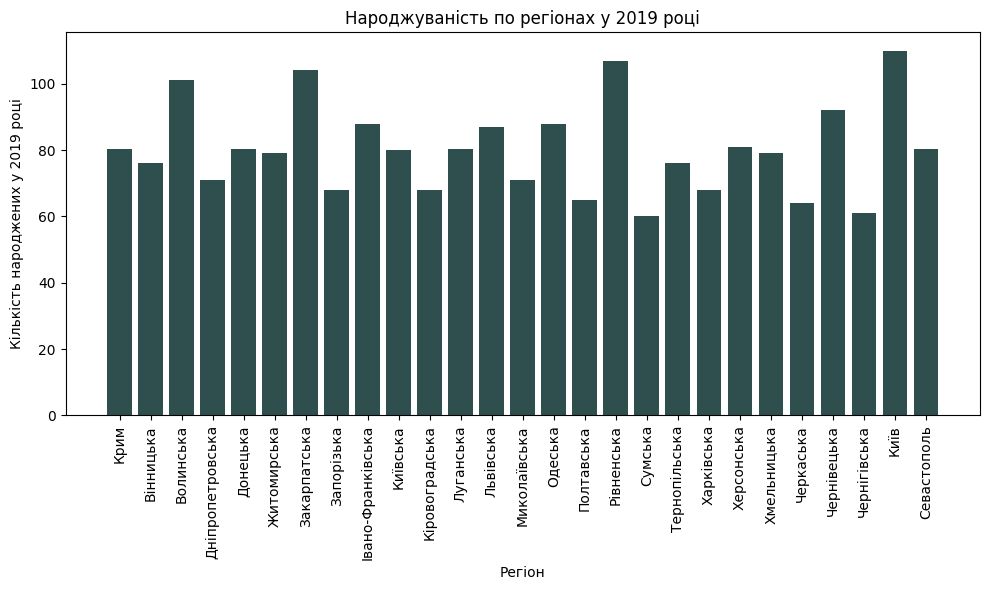

In [38]:
births_2019 = df['2019']
regions = df['Регіон']
plt.figure(figsize=(10, 6))
plt.bar(regions, births_2019, color='DarkSlateGrey')
plt.xlabel('Регіон')
plt.ylabel('Кількість народжених у 2019 році')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Додаткові графіки

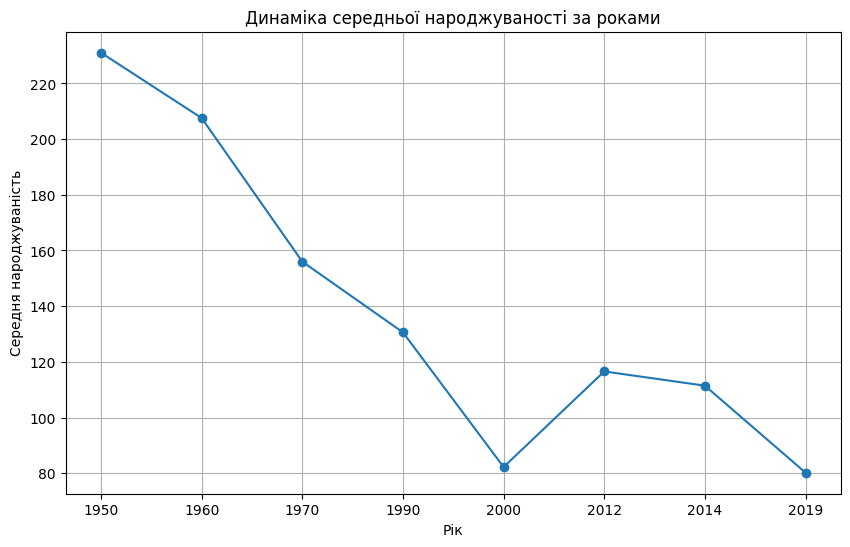

In [45]:
mean_births_by_year = df.drop(columns=['Регіон']).mean(axis=0)
plt.figure(figsize=(10, 6))
plt.plot(mean_births_by_year.index, mean_births_by_year.values, marker='o', linestyle='-')
plt.xlabel('Рік')
plt.ylabel('Середня народжуваність')
plt.title('Динаміка середньої народжуваності за роками')
plt.grid(True)
plt.show()


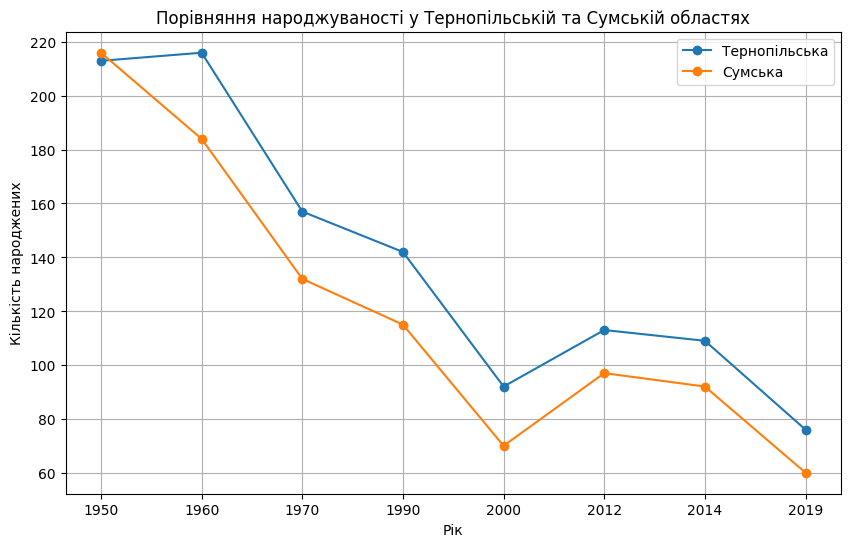

In [47]:
region1 = df.loc[df['Регіон'] == 'Тернопільська']
region2 = df.loc[df['Регіон'] == 'Сумська']

years = region1.columns[1:]

plt.figure(figsize=(10, 6))
plt.plot(years, region1.values[0][1:], marker='o', linestyle='-', label=region1['Регіон'].values[0])
plt.plot(years, region2.values[0][1:], marker='o', linestyle='-', label=region2['Регіон'].values[0])

plt.xlabel('Рік')
plt.ylabel('Кількість народжених')
plt.title('Порівняння народжуваності у Тернопільській та Сумській областях')
plt.legend()
plt.grid(True)
plt.show()
